In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../output/intercciones-por-delito-mean.csv")

In [3]:
df

,TipoDelito,Comments,Likes,Retweets,Interactions
0,Accidente Vehicular,6.733945,30.211009,100.990826,141625.238532
1,Agresión,31.813953,158.697674,511.627907,405122.372093
2,Extorsión,251.000000,29.178000,950.500000,693000.000000
3,Fraude,9.500000,90.000000,166.000000,179777.500000
4,Homicidio,14.057692,112.403846,310.634615,645870.692308
5,Incendio,0.500000,8.400000,30.300000,229952.700000
6,Robo,43.704545,173.727303,594.954545,592946.575758
7,Secuestro,0.000000,60.000000,176.000000,134000.000000
8,Vandalismo,44.250000,108.250000,339.625000,526665.375000


In [4]:
X = df.iloc[:,1:]

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(X)

StandardScaler()

In [7]:
X_norm = sc.transform(X)

In [8]:
X_norm

array([[-0.50675719, -1.0079792 , -0.92057375, -1.17789822],
       [-0.17127187,  1.32805282,  0.57705899,  0.05031017],
       [ 2.76069281, -1.02676047,  2.17766752,  1.3921605 ],
       [-0.46975677,  0.07905187, -0.68347907, -1.00006354],
       [-0.40879033,  0.48637898, -0.15598278,  1.17248217],
       [-0.59014619, -1.40452787, -1.17838996, -0.76618775],
       [-0.01221615,  1.60130837,  0.88095922,  0.92579317],
       [-0.59683449, -0.46638186, -0.64700811, -1.21344085],
       [-0.00491982,  0.41085738, -0.05025207,  0.61684436]])

In [9]:
X_norm.shape

(9, 4)

In [10]:
clusters = np.arange(2,10)

In [11]:
clusters

array([2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [13]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [14]:
eva

,K,inercia
0,2,17.295081
1,3,4.198855
2,4,2.295454
3,5,1.104103
4,6,0.624707
5,7,0.380343
6,8,0.180253
7,9,0.000000


<Axes: xlabel='K', ylabel='inercia'>

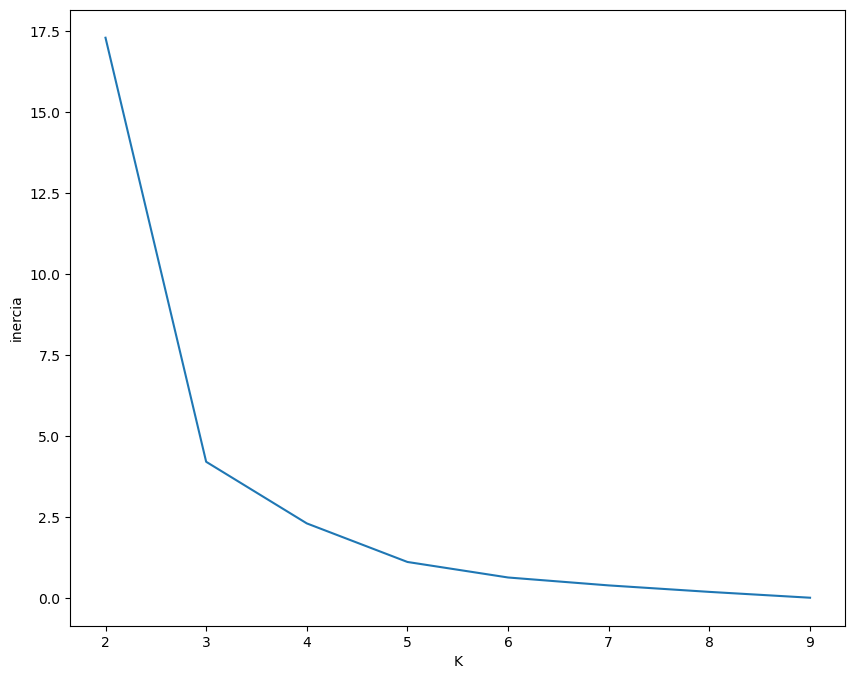

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [17]:
kmeans.fit(X_norm)

C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lo206\anaconda3\envs\ICD\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[-0.14929954,  0.95664939,  0.31294584,  0.69135746],
       [-0.54087366, -0.69995927, -0.85736272, -1.03939759],
       [ 2.76069281, -1.02676047,  2.17766752,  1.3921605 ]])

In [19]:
df["cluster"] = kmeans.labels_

In [20]:
df.columns

Index(['TipoDelito', 'Comments', 'Likes', 'Retweets', 'Interactions',
       'cluster'],
      dtype='object')

In [21]:
df[['Comments', 'Likes', 'Retweets', 'Interactions']] = df[['Comments', 'Likes', 'Retweets', 'Interactions']].astype(int)

In [22]:
df.columns = ['Views' if x == 'Interactions' else x for x in df.columns]

In [23]:
df.sort_values(by='cluster')

,TipoDelito,Comments,Likes,Retweets,Views,cluster
1,Agresión,31,158,511,405122,0
4,Homicidio,14,112,310,645870,0
6,Robo,43,173,594,592946,0
8,Vandalismo,44,108,339,526665,0
0,Accidente Vehicular,6,30,100,141625,1
3,Fraude,9,90,166,179777,1
5,Incendio,0,8,30,229952,1
7,Secuestro,0,60,176,134000,1
2,Extorsión,251,29,950,693000,2


In [24]:
df.shape

(9, 6)

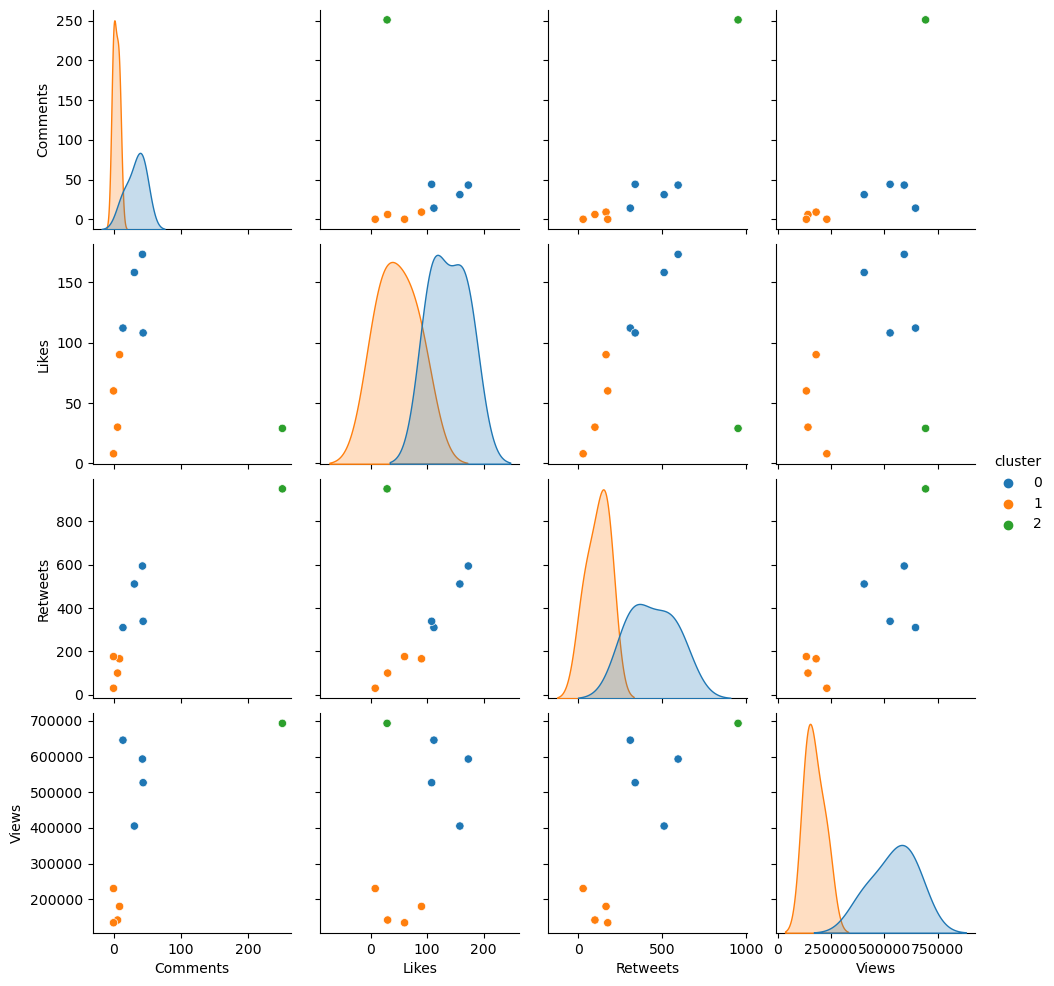

In [45]:
sns.pairplot(df,hue="cluster", palette="tab10")

In [26]:
df.loc[df["cluster"]==0]

,TipoDelito,Comments,Likes,Retweets,Views,cluster
1,Agresión,31,158,511,405122,0
4,Homicidio,14,112,310,645870,0
6,Robo,43,173,594,592946,0
8,Vandalismo,44,108,339,526665,0


In [27]:
df.loc[df["cluster"]==1]

,TipoDelito,Comments,Likes,Retweets,Views,cluster
0,Accidente Vehicular,6,30,100,141625,1
3,Fraude,9,90,166,179777,1
5,Incendio,0,8,30,229952,1
7,Secuestro,0,60,176,134000,1


In [28]:
df.loc[df["cluster"]==2]

,TipoDelito,Comments,Likes,Retweets,Views,cluster
2,Extorsión,251,29,950,693000,2


<Axes: xlabel='cluster', ylabel='Comments'>

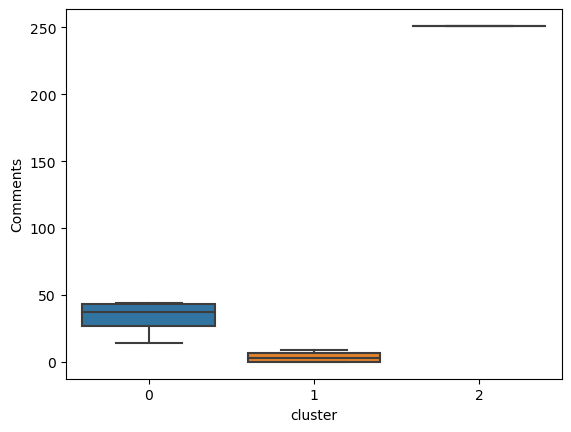

In [29]:
sns.boxplot(x="cluster", y="Comments", data=df)

<Axes: xlabel='cluster', ylabel='Likes'>

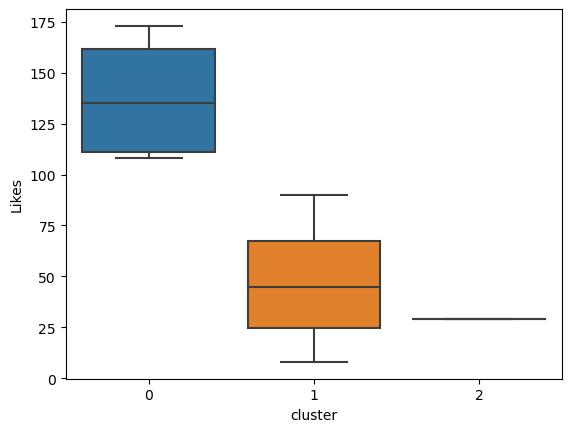

In [30]:
sns.boxplot(x="cluster", y="Likes", data=df)

<Axes: xlabel='cluster', ylabel='Retweets'>

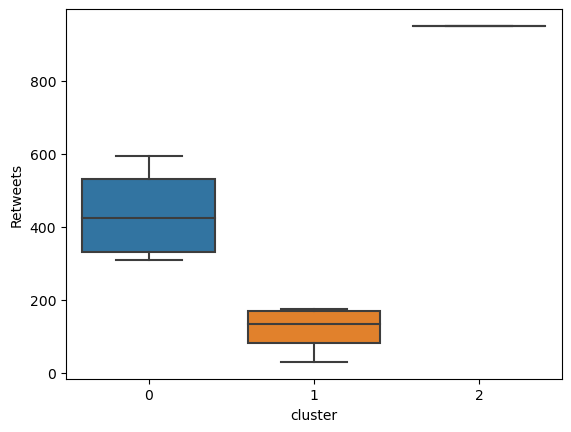

In [31]:
sns.boxplot(x="cluster", y="Retweets", data=df)

<Axes: xlabel='cluster', ylabel='Views'>

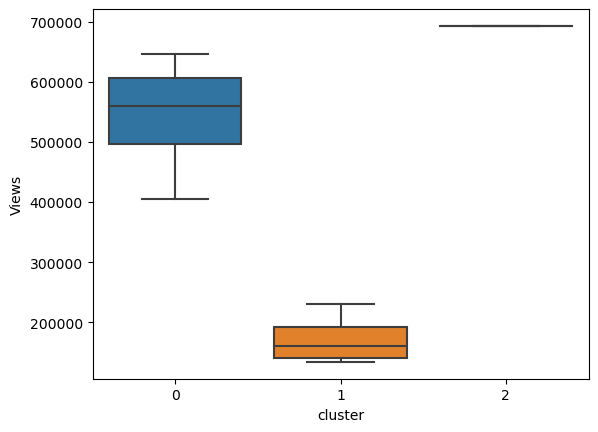

In [33]:
sns.boxplot(x="cluster", y="Views", data=df)

In [ ]:
df